# Stat 140: HW 5

This assignment is due at the **start** of class on Tuesday, February 13th.  You will submit the assignment by clicking the "Submit" button by the assignment on the "My Courses" view in Gryd.

You are encouraged to work with others on the assignment, but **each person must submit their own copy of the assignment**.  You should not copy large blocks of text from another classmate.

You are encouraged to come to office hours and/or the TA evening group work sessions if you get stuck!

## Problem 1 (Loading Packages)

You will need functions from the `readr`, `dplyr`, `ggplot2`, and `mosaic` packages to complete this assignment.  In the R cell below, insert appropriate calls to load those four packages (in that order).

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(mosaic)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggformula

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following objects are masked from ‘package:dplyr’:

    count, do, tally

The following objects are masked from ‘package:stats’:

    binom.test, co

## Problem 2 (Gender Bias in University Admissions)

Let's consider a dataset that includes records of admissions decisions for applicants to graduate school at UC Berkeley for the six largest departments in 1973.  These data were discussed in Bickel, P. J., Hammel, E. A., and O'Connell, J. W. (1975) Sex bias in graduate admissions: Data from Berkeley. _Science_, *187*, 398-403.  We're going to investigate the question of whether there was a gender bias in admission decisions made that year.

The data are available in a comma-separated value (csv) file at http://www.evanlray.com/stat140_s2018/data/base_r/UCBAdmissions.csv.

### a. In the following R cell, read the data file in to R and store it in a data frame.

You can name the data frame whatever you want; something like `admissions` might be a good choice.

In [2]:
admissions <- read_csv("http://www.evanlray.com/stat140_s2018/data/base_r/UCBAdmissions.csv")

Parsed with column specification:
cols(
  applicant_id = col_integer(),
  dept = col_character(),
  gender = col_character(),
  admit = col_character()
)


### b. How many observational units are there in the data set?  What is each observational unit (be as specific as possible)?  How many variables are there in the data set?

Enter any R commands you need to answer these questions in the cell below, and then answer these questions with complete sentences in the cell below that.

In [5]:
dim(admissions)
head(admissions)

[1] 4526    4

applicant_id,dept,gender,admit
1,D,Female,Admitted
2,C,Female,Admitted
3,C,Female,Admitted
4,C,Female,Admitted
5,A,Female,Admitted
6,B,Male,Rejected


There are 4526 observational units in the data set.  Each observational unit is an applicant to one of the six largest graduate programs at the University of California, Berkeley in 1973.

There are 4 variables in the data set.

### c. What type of variable is each of the variables in the data set?  For categorical variables, address whether the variable is nominal or ordinal.

In case the meanings of the variables is not clear from the variable names, here is a description of each variable:

 1. `applicant_id`: a unique identifier for the applicant
 
 2. `dept`: the department the applicant applied to
 
 3. `gender`: the applicant's gender
 
 4. `admit`: whether or not the applicant was admitted

`applicant_id` is an identifier variable.  `dept` is a nominal categorical variable (although the departments are assigned letters A through F in this data set, there is no particular ranking or order among the departments).  `gender` is a nominal categorical variable.  `admit` is an ordinal categorical variable (being Admitted is better than being Rejected).

### d. Filter the data set to include only observations from departments "B" and "F"

This won't change the fundamental story with this data set, but will save you some time relative to analyzing data from all of the departments.

In [6]:
admissions <- admissions %>%
  filter(dept %in% c("B", "F"))

### e. Set any categorical variables to factors

The factors should be ordered or unordered as appropriate based on your answer to part c.  You may need to first find out what the distinct levels of the variables are, in order to set the levels appropriately.

In [8]:
# I actually think you could tell what the distinct levels were from the output above,
# but will demonstrate the use of distinct anyways.

admissions %>% distinct(dept)
admissions %>% distinct(gender)
admissions %>% distinct(admit)

admissions <- admissions %>%
  mutate(
    dept = factor(dept),
    gender = factor(gender),
    admit = factor(admit, levels = c("Rejected", "Admitted"), ordered = TRUE)
  )

dept
B
F


gender
Male
Female


admit
Rejected
Admitted


### f. How many applicants were there in each combination of levels of the `gender` variable and the `admit` variable, in this reduced data set?

Enter any commands you need in the R cell below:

In [9]:
tally(admit ~ gender, data = admissions)

          gender
admit      Female Male
  Rejected    325  558
  Admitted     41  375

### g. Make an appropriate plot of the `gender` and `admit` variables.  (Make a single plot displaying both variables)

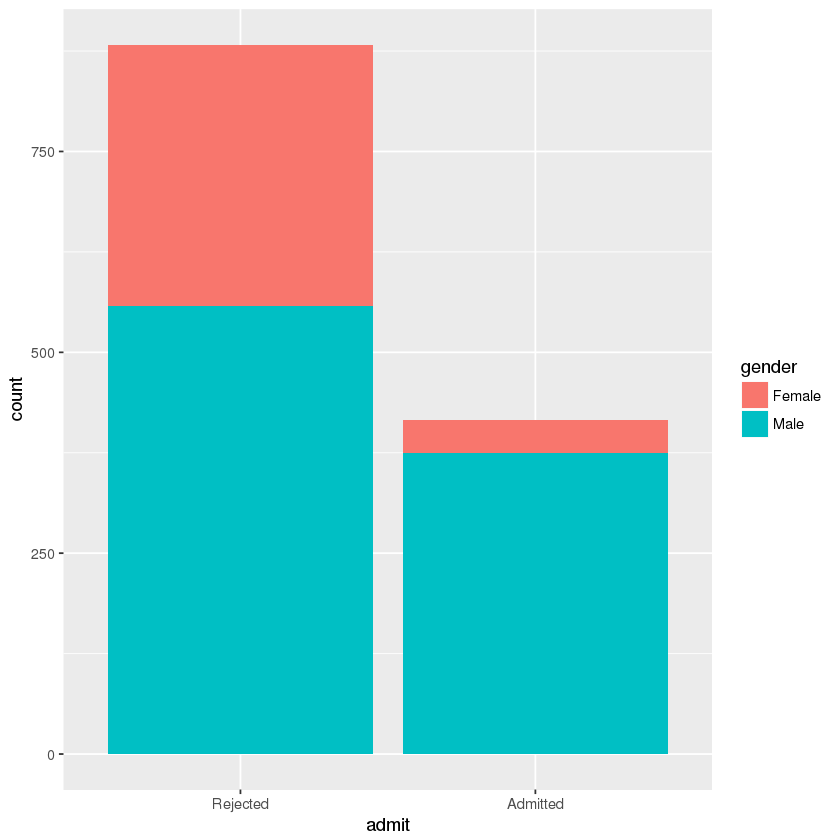

In [11]:
ggplot(data = admissions, mapping = aes(x = admit, fill = gender)) +
  geom_bar()

### h. What is the joint distribution of `gender` and `admit` status in this reduced data set?

There are a total of 1299 applicants in the reduced data set.  For the joint distribution, we need to find what proportion of these applicants were in each combination of levels of the `gender` and `admit` variables:

gender = Female, admit = Rejected: 325/1299 = 0.250

gender = Female, admit = Admitted:  41/1299 = 0.032

gender = Male, admit = Rejected: 558/1299 = 0.430

gender = Male, admit = Admitted: 375/1299 = 0.289

### i. What is the marginal distribution of `admit` status in this reduced data set?

You should be able to answer this question using the R output you already obtained above; however, it may be easier to enter a new R command to get just the numbers you need.  (In short, you can enter a new R command in the cell below if that would be helpful to you, but you don't need to).  You will need to type in your answer in the Markdown cell below that.

In [12]:
tally( ~ admit, data = admissions)

admit
Rejected Admitted 
     883      416 

Rejected: 883/1299 = 0.680

Admitted: 416/1299 = 0.320

### j. What is the conditional distribution of `admit` status given that the applicant's `gender` was female, in this reduced data set?

There were a total of 366 female applicants in the reduced data set.  Among just these applicants, the conditional distribution of the admit status was:

Rejected: 325/366 = 0.888

Admitted: 41/366 = 0.112

### k. What is the conditional distribution of `admit` status given that the applicant's `gender` was male, in this reduced data set?

There were a total of 933 male applicants in the reduced data set.  Among just these applicants, the conditional distribution of the admit status was:

Rejected: 558/933 = 0.598

Admitted: 375/933 = 0.402

### l. Are the `admit` status and `gender` variables independent?  Explain.  Were males or females admitted at a higher rate?

Comparing the answers to parts j and k, we see that the conditional distribution of admit status was not the same given that the applicant was female as it was given that the applicant was male.  This means that the admit variable is not independent of the gender variable.  Overall, across these two departments males were admitted at a higher rate.

### m. Find the conditional distribution of `admit` status given that the applicant's `gender` was female, just among those people who applied to department "B", and do this again given that the applicant's `gender` was male.  For department "B", were males or females admitted at a higher rate?

One way to get the numbers you need would be to first create a filtered data set with just the observations for applicants to department "B", and then get counts for each combination of levels of `admit` status and `gender` for just that department.

In [13]:
admissions_b <- admissions %>% filter(dept == "B")
tally(admit ~ gender, data = admissions_b)

          gender
admit      Female Male
  Rejected      8  207
  Admitted     17  353

Conditional distribution of admit status given that the applicant's gender was female:

Rejected: 8/25 = 0.320

Admitted: 17/25 = 0.680

Conditional distribution of admit status given that the applicant's gender was male:

Rejected: 207/560 = 0.370

Admitted: 353/560 = 0.630

In department "B", female applicants were admitted at a higher rate than male applicants.

### n. Find the conditional distribution of `admit` status given that the applicant's `gender` was female, just among those people who applied to department "F", and do this again given that the applicant's `gender` was male.  For department "F", were males or females admitted at a higher rate?

One way to get the numbers you need would be to first create a filtered data set with just the observations for applicants to department "F", and then get counts for each combination of levels of `admit` status and `gender` for just that department.

In [14]:
admissions_f <- admissions %>% filter(dept == "F")
tally(admit ~ gender, data = admissions_f)

          gender
admit      Female Male
  Rejected    317  351
  Admitted     24   22

Conditional distribution of admit status given that the applicant's gender was female:

Rejected: 317/341 = 0.930

Admitted: 24/341 = 0.070

Conditional distribution of admit status given that the applicant's gender was male:

Rejected: 351/373 = 0.941

Admitted: 22/373 = 0.059

In department "F", female applicants were admitted at a higher rate than male applicants.

### o. Compare your answers to parts l, m, and n.  Were your answers consistent in all three of those groups of data?  What is the name of this phenomenon?  Why does it matter?

If we aggregate the data across both departments B and F, male applicants were admitted at a higher rate than female applicants (part l).  But if we break the data down and look within each department, female applicants were admitted at a higher rate than male applicants within department B and within department F.

The results change direction depending on how many variables we include in our analysis, or put another way, how much we aggregate the data.  This phenomenon is called Simpson's paradox.  It's important because it emphasizes that we need to be sure we have included all relevant variables in our analysis; otherwise, we may be misled about the relationships between variables we are thinking about (like gender and admissions, in this case).

## Problem 3 (Cloud seeding, adapted from SDM4 4.40)

In an experiment to determine whether seeding clouds with silver iodide increases rainfall, 52 clouds were randomly assigned to be seeded for not. The amount of rain they generated was then measured (in acre-feet).

The data are available in a csv file at http://www.evanlray.com/stat140_s2018/data/sdm4/Cloud_seeding_long.csv

### a. Read the data file into R and store it in a data frame.

In [15]:
rainfall <- read_csv("http://www.evanlray.com/stat140_s2018/data/sdm4/Cloud_seeding_long.csv")

Parsed with column specification:
cols(
  treatment = col_character(),
  rainfall_amount = col_double()
)


### b. What is each observational unit in this data set?  How many observational units are there?

In [16]:
dim(rainfall)
head(rainfall)

[1] 52  2

treatment,rainfall_amount
unseeded,1202.6
unseeded,830.1
unseeded,372.4
unseeded,345.5
unseeded,321.2
unseeded,244.3


Each observational unit is one of the clouds that was included in this experiment.  There were 52 observational units.

### c. What are the variables in this data set?  Is each variable categorical or quantitative?  For the categorical variables, are they nominal or ordinal?

In [ ]:
# I didn't see any need to write more code here.

The variables are `treatment`, which indicates whether the cloud was seeded or unseeded; and `rainfall_amount`, which is the amount of rainfall measured for that cloud.  `treatment` is a categorical variable, but I think reasonable people could disagree about whether it is nominal or ordinal (credit for either answer).  `rainfall_amount` is quantitative.

### d. Convert any categorical variables in the data set to factors, using ordering if appropriate.

In [18]:
rainfall <- rainfall %>%
  mutate(treatment = factor(treatment))

### e. Make an appropriate plot of the data.  You should use both variables in the same plot.

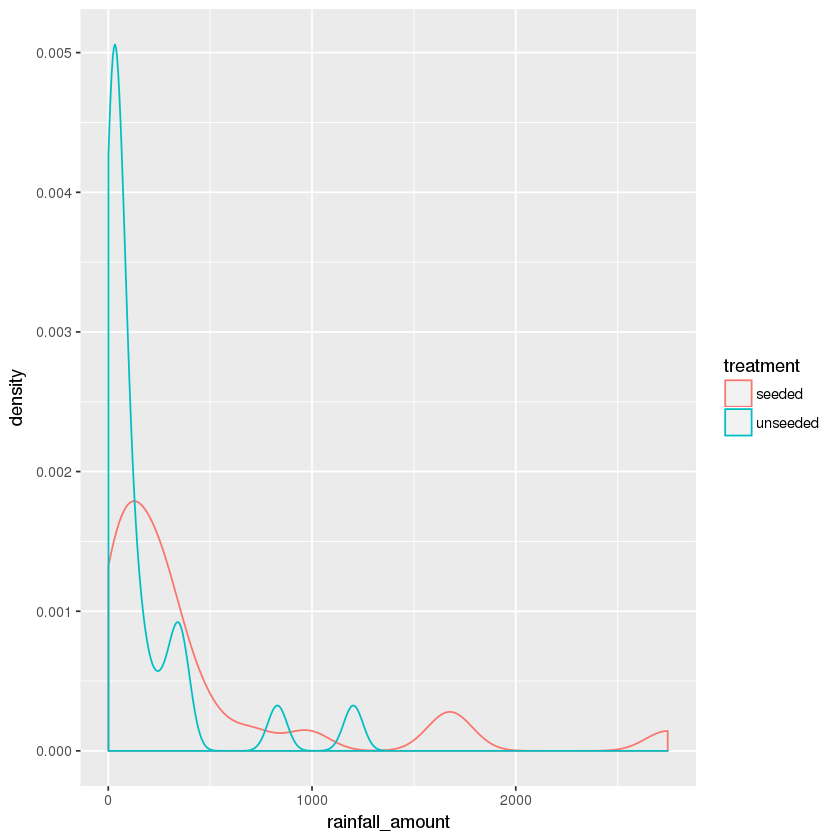

In [19]:
ggplot(data = rainfall, mapping = aes(x = rainfall_amount, color = treatment)) +
  geom_density()

### f. Based on the plot you created in part e, would it be more appropriate to compare the distributions of rainfall under the two treatments with the mean and standard deviation, or with the median, quartiles, and inter-quartile range?

The distribution of rainfall is skewed right in both groups, so we should summarize the distribution with statistics like the median, quartiles, and inter-quartile range.

### g. Calculate the statistics you chose in part f separately for each level of the `treatment` variable.
Hint: The best way to do this is by using `group_by()` to group by the treatment, and then using the `summarize()` function to calculate the chosen statistics.

In [20]:
rainfall %>%
  group_by(treatment) %>%
  summarize(
    median_rainfall = median(rainfall_amount),
    q1_rainfall = quantile(rainfall_amount, probs = 0.25),
    q3_rainfall = quantile(rainfall_amount, probs = 0.75),
    iqr_rainfall = IQR(rainfall_amount)
  )

treatment,median_rainfall,q1_rainfall,q3_rainfall,iqr_rainfall
seeded,221.6,98.125,406.025,307.900
unseeded,44.2,24.825,159.200,134.375


### h. Do you see any evidence that seeding clouds may be effective?  Explain your thinking.

Yes, it appears that clouds that have been seeded have higher rainfall amounts.  The median rainfall amount and quartiles of rainfall amounts are higher for seeded clouds than for unseeded clouds.  We also saw this in the plot above, where seeded clouds generally had more rainfall.